<a href="https://colab.research.google.com/github/priyansu-debug/Data_Mining-Data_Warehouse/blob/main/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [9]:
# select relevant columns
data = titanic[['survived', 'age', 'sex', 'class']]

# Drop rows with missing age
data = data.dropna()

In [11]:
# convert Categorical to numeric
data['sex']= data['sex'].map({'male':0, 'female':1})
data['class']= data['class'].map({'Third':3, 'Second': 2, 'First':1})
x= data[['age','sex','class']]
y=data['survived']
print(x.head())
print(y.head())

    age  sex  class
0  22.0  NaN    NaN
1  38.0  NaN    NaN
2  26.0  NaN    NaN
3  35.0  NaN    NaN
4  35.0  NaN    NaN
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Training size:",len(x_train))
print("Testing size:",len(x_test))

Training size: 571
Testing size: 143


In [13]:
# Initialize and train model
clf= DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [14]:
# Predictions
y_pred=clf.predict(x_test)

#Accuracy
print("Accuracy", accuracy_score(y_test, y_pred))

#Classification report
print("\nClassification Report:\n", classification_report(y_test,y_pred))

#confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy 0.6083916083916084

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.97      0.75        87
           1       0.50      0.05      0.10        56

    accuracy                           0.61       143
   macro avg       0.56      0.51      0.42       143
weighted avg       0.57      0.61      0.49       143


Confusion Matrix:
 [[84  3]
 [53  3]]


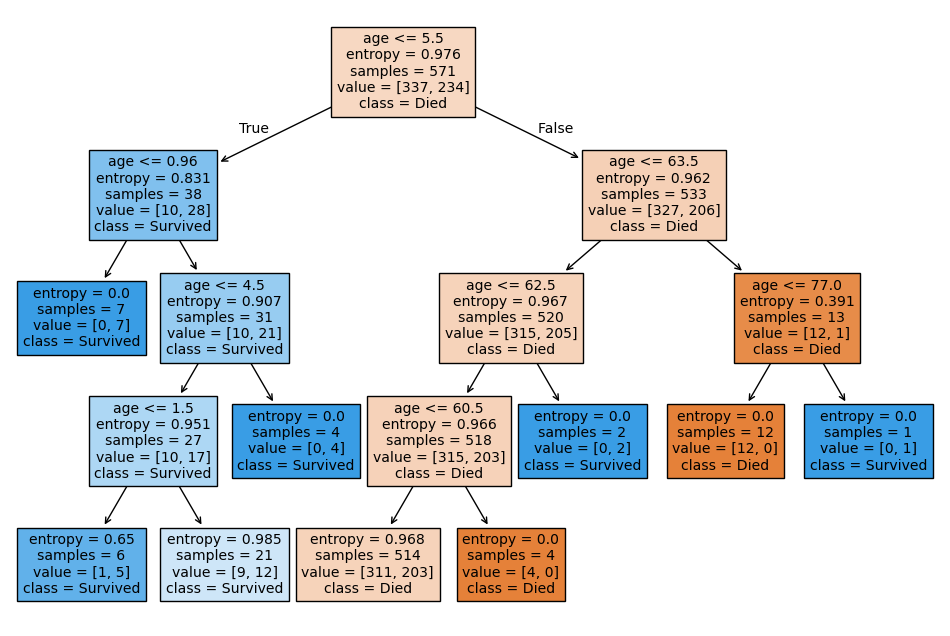

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['age','sex','class'], class_names=['Died', 'Survived'], filled=True)
plt.show()